In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import os
import copy
from football_sim.all import Calibrator, Season,Settings
%matplotlib inline
import platform

In [2]:
base_dir = './'

settings = Settings(os.path.join(base_dir, 'config.yaml'))

In [3]:
calib = Calibrator(settings)
calib.download_all_data() 
calib.process_data()

In [4]:
year = 2020
league = 'BPL'
as_of=pd.to_datetime('2020-01-01')
as_of=None
calib.calibrate_teams(league,year,as_of=as_of)

In [5]:
season = Season(league, year,calib, use_home_advantage=False,as_of=as_of)
print('home advantage', season.home_advantage)

season.process_current_results()
season.simulate_season(n_scenarios=100000)

season.process_simulation()

home advantage 1


In [6]:

ind=None
#i=season.match_id['bpl_liverpool_chelsea_2020-07-22']
#hg=season.simulated_home_goals[i,:]
#ag=season.simulated_away_goals[i,:]
#ind=(hg>=3)&(ag>=1)
#ind=None
#ind = ind&(ag<hg)
# ind= None
#i = season.team_id['Manchester United']
#ind = season.place_per_team[i,:]<=4
#ind = None
sr=season.season_report(ind=ind)
sr

,Played,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,rating,Degr
Liverpool,15,32,77.5,68,87,4,1,52.21,96.96,5.58,0.31,17.923472,0.00
Manchester City,14,26,76.2,66,86,4,1,39.30,95.18,5.55,0.25,21.825363,0.00
Manchester United,14,27,64.9,54,75,10,2,2.28,42.20,4.44,0.36,12.487032,0.00
Chelsea,15,25,64.4,54,75,10,2,2.00,41.92,4.65,0.31,14.886842,0.00
Leicester City,15,28,64.1,54,74,10,2,1.50,37.26,4.03,0.33,12.326666,0.00
Aston Villa,13,25,62.8,52,73,11,2,1.30,31.63,4.32,0.36,12.135525,0.00
Everton,15,29,61.6,52,72,11,3,0.67,22.13,3.92,0.36,11.017628,0.00
Tottenham Hotspur,15,26,61.4,51,72,11,3,0.66,23.37,4.19,0.36,11.733344,0.00
Southampton,15,25,54.8,45,65,14,5,0.04,3.66,3.49,0.36,9.683606,0.07
West Ham United,15,22,54.2,44,64,14,5,0.02,3.10,3.83,0.38,10.070613,0.15


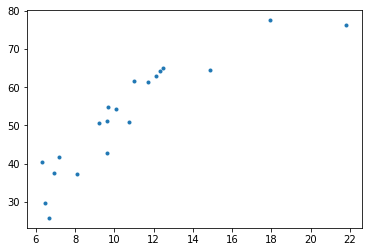

In [7]:
plt.plot(sr['rating'],sr['Points (mean)'],'.')

Aston Villa
Chelsea
Everton
Leicester City
Liverpool
Manchester City
Manchester United
Tottenham Hotspur


Text(0.5, 0, 'def')

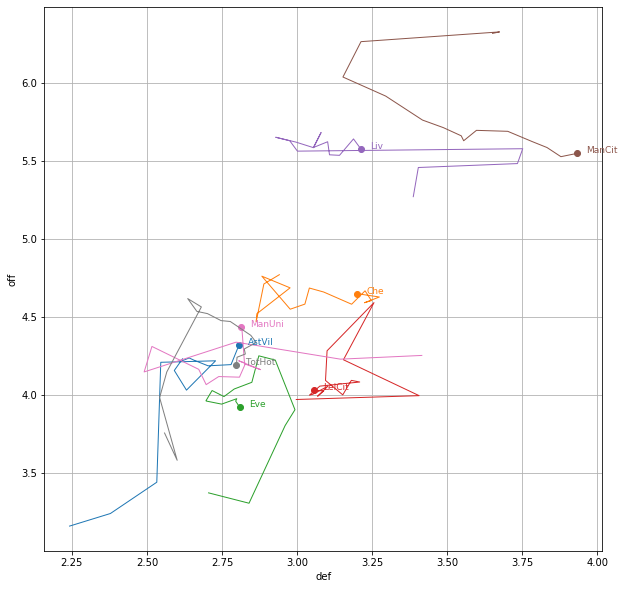

In [8]:
team_names = list(season.teams.keys())
y=[season.teams[x].offense for x in team_names]
x=[1/season.teams[x].defense for x in team_names]
plt.figure(figsize=(10,10))
#plt.plot(x,y,'.')
c=0
for x_,y_,name in zip(x,y,team_names):
    team = season.teams[name]
    if dict(sr['CL'])[name]>20:
        print(name)
        if c<=9:
            sym='-'
        else:
            sym='-'
        p=plt.plot(1/np.array(team.defense_hist),team.offense_hist,sym,label=name,color='C{:d}'.format(c),linewidth=1)
        c+=1
        plt.plot(x_,y_,'o',color=p[0].get_color())
        name_=''.join([x[:3] for x in name.split()])
        plt.text(x_+0.03,y_,name_,fontsize=9,color=p[0].get_color())
plt.grid(True)
plt.ylabel('off')
plt.xlabel('def')
#plt.legend()

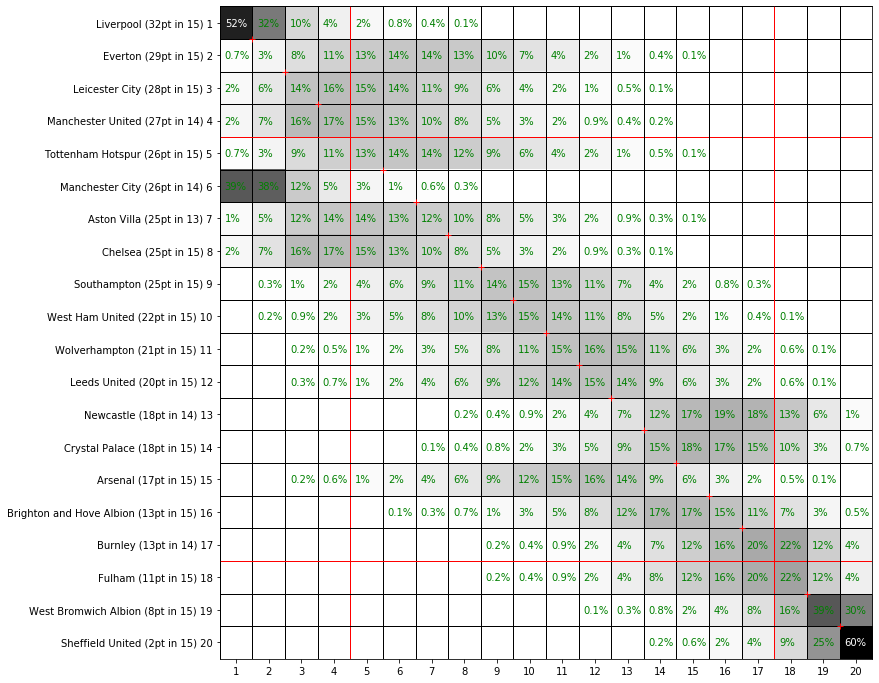

In [9]:
season.probability_grid(ind=ind);

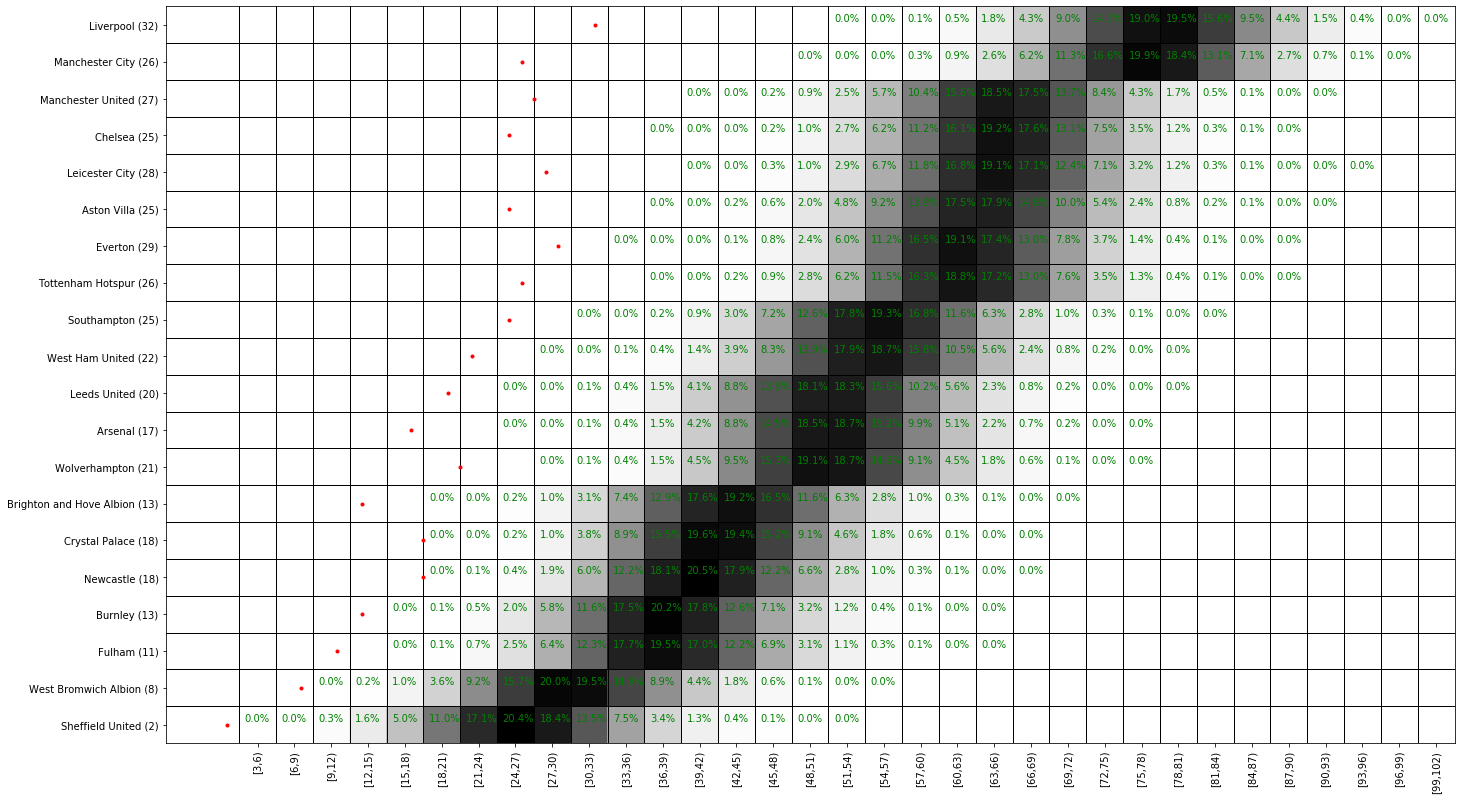

In [10]:
season.points_probability_grid(ind=ind);

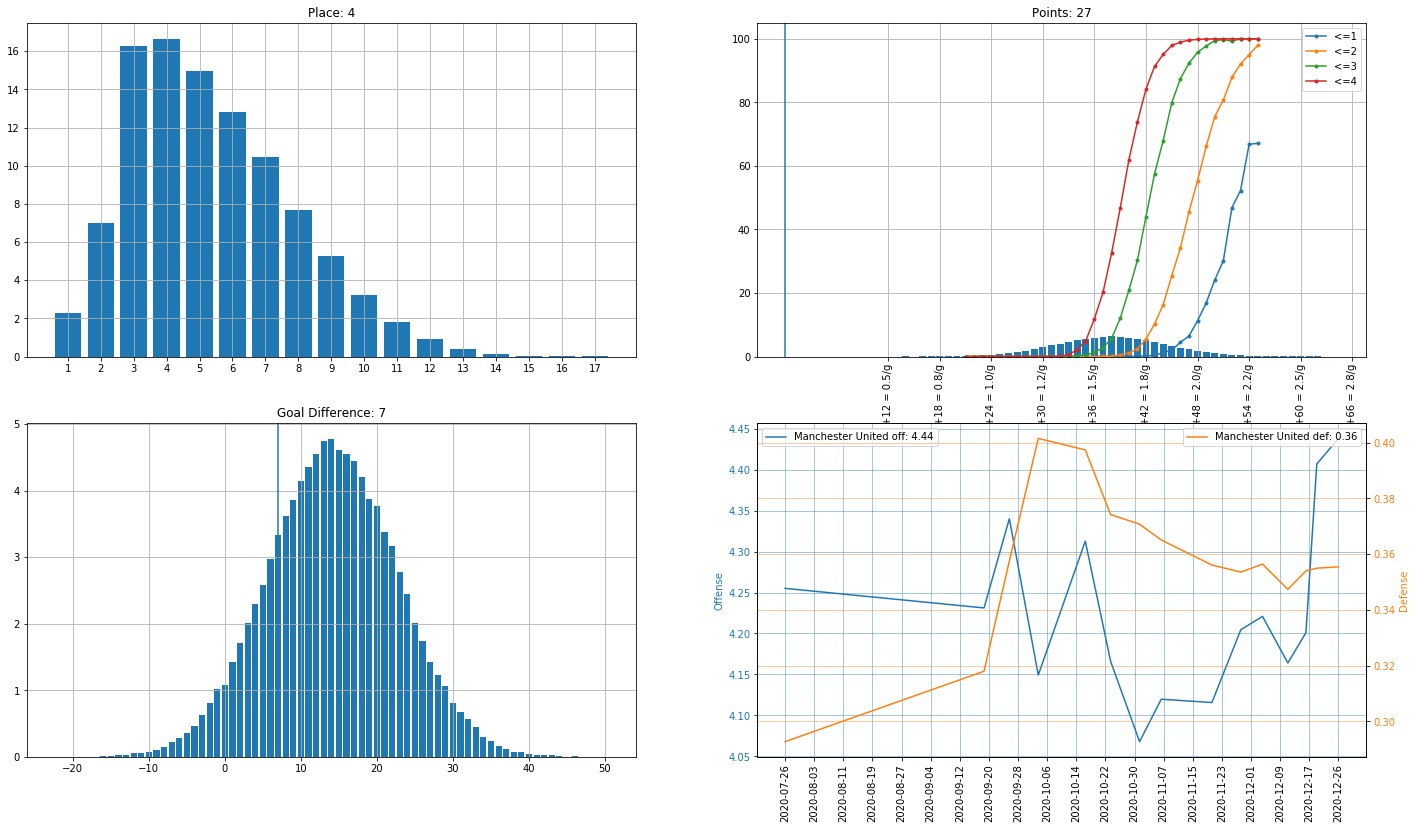

In [11]:
my_team = season.teams['Manchester United']

names = []
importance = []
for m in season.matches_to_sim:
    p=season.what_if(m,ref_team=my_team,place=4,or_better=True,show_plot=False)[0]
    names.append(m.id)
    importance.append(np.sum((p[1:]-p[0])**2))

names=np.array(names)
importance=np.array(importance)

isort = np.argsort(-importance)
names=names[isort]
importance=importance[isort]
season.team_report(my_team,places=[1,2,3,4])


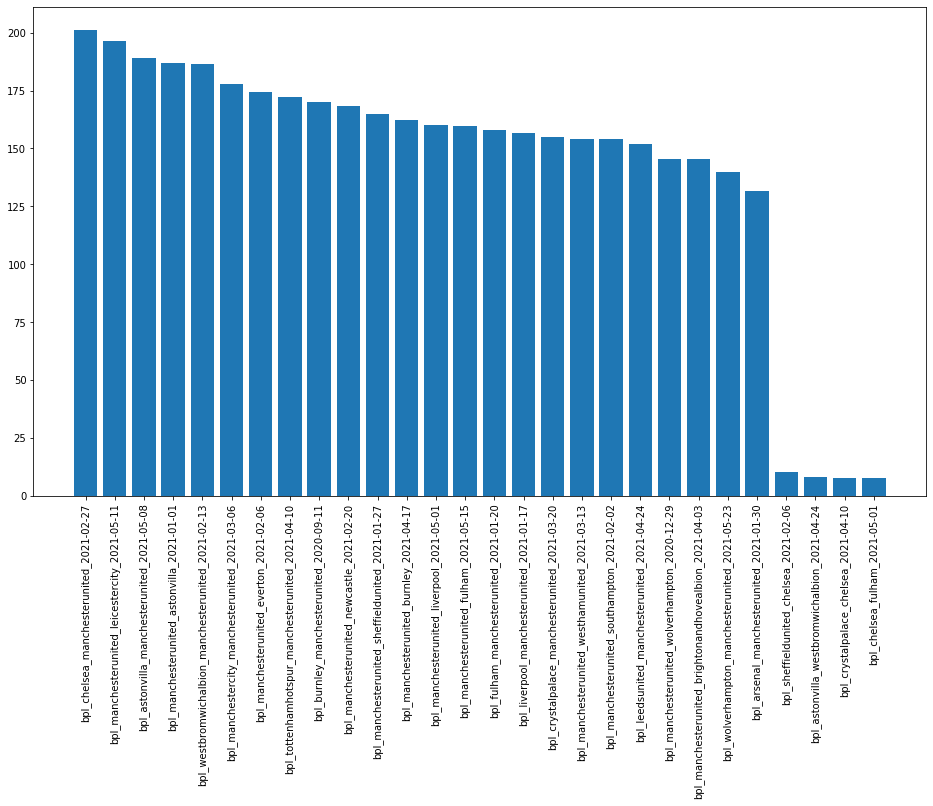

In [12]:
n_plot=28

plt.figure(figsize=(16,9))
plt.bar(np.arange(n_plot),importance[:n_plot])
plt.xticks(np.arange(n_plot),names[:n_plot],rotation=90);

(array([42.199     , 49.66961316, 33.47166571, 38.49832979]),
 <Figure size 1152x648 with 1 Axes>)

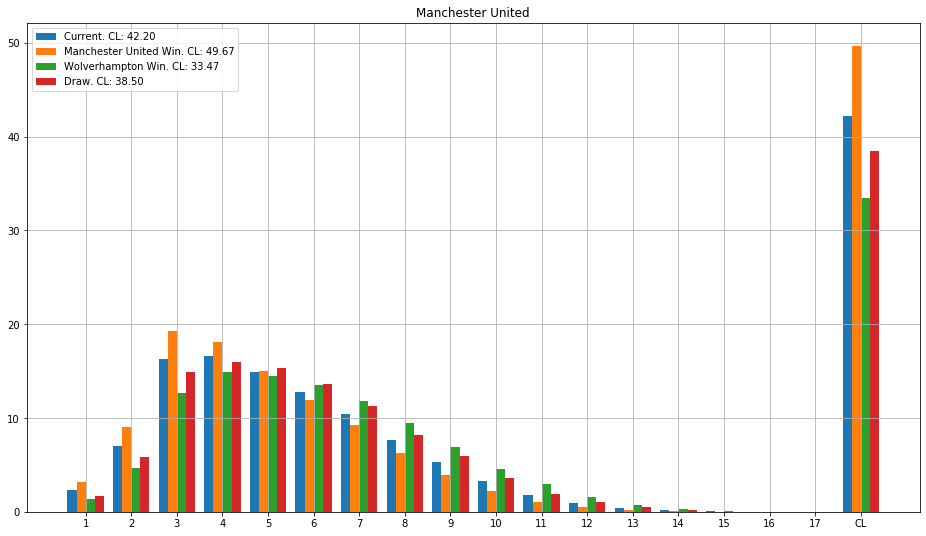

In [13]:
i=season.match_id['bpl_manchesterunited_wolverhampton_2020-12-29']
match = season.matches_to_sim[i]
mufc = season.teams['Manchester United']
#wh = season.teams['West Ham United']
season.what_if(match,ref_team=mufc)

D:\Miniconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


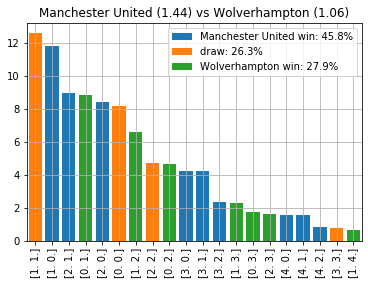

In [14]:
match.home_team.outcomes_vs(match.away_team)

In [15]:
home_team=match.home_team
away_team=match.away_team
if home_team.name == 'Manchester United':
    print('home')
    l_mu=home_team.offense*away_team.defense/90
    l_other=home_team.defense*away_team.offense/90
    other_team_name = away_team.name
elif away_team.name == 'Manchester United':
    print('away')
    l_mu=home_team.defense*away_team.offense/90
    l_other=home_team.offense*away_team.defense/90
    other_team_name = home_team.name
else:
    print('no MU')


g_mu=np.random.exponential(1/l_mu,[100000,100])
g_other=np.random.exponential(1/l_other,[100000,100])
ng_mu=(g_mu.cumsum(axis=1)<90).sum(axis=1)
ng_other=(g_other.cumsum(axis=1)<90).sum(axis=1)



u_res,n=np.unique(np.array([ng_mu,ng_other]),axis=1,return_counts=True)
#isort=np.argsort(-n)
#u_res[:,isort[:10]]
points_for_right_result = 2
points_for_right_score = 3

points=[]

for i in range(u_res.shape[1]):
    guess = u_res[:,i]
    ind_right_score = (ng_mu==guess[0])&((ng_other==guess[1]))
    points_=points_for_right_score*ind_right_score.mean()
    #points_=0
    ind_right_result = (guess[0]>guess[1])&(ng_mu>ng_other)
    ind_right_result = ind_right_result | (guess[0]==guess[1])&(ng_mu==ng_other)
    ind_right_result = ind_right_result | (guess[0]<guess[1])&(ng_mu<ng_other)
    points_+=points_for_right_result*ind_right_result.mean()
    points.append(points_)
    #g_mu[:,0]
    
points=np.array(points)


df=pd.DataFrame({'Manchester United':u_res[0,:],other_team_name:u_res[1,:],'Points':points})
df=df.sort_values(by='Points',ascending=False)
df.head(10)

home


,Manchester United,Wolverhampton,Points
8,1,0,1.26243
17,2,1,1.18758
16,2,0,1.16922
24,3,1,1.04775
23,3,0,1.03248
25,3,2,0.98319
33,4,1,0.96198
32,4,0,0.96072
34,4,2,0.93963
40,5,1,0.92826


In [16]:
season.matches_remaining(team_filter=['Manchester U'])

,Date,Home,Away,Home Wins,Draw,Away Wins,av HG,av AG
0,2020-09-11,Burnley,Manchester United,20.6,23.8,55.6,1.0,1.7
1,2020-12-29,Manchester United,Wolverhampton,45.7,26.3,28.0,1.4,1.1
2,2021-01-01,Manchester United,Aston Villa,39.2,23.8,37.0,1.6,1.5
3,2021-01-17,Liverpool,Manchester United,51.4,21.9,26.7,2.0,1.4
4,2021-01-20,Fulham,Manchester United,24.7,21.5,53.8,1.3,2.0
5,2021-01-27,Manchester United,Sheffield United,56.5,23.7,19.8,1.7,0.9
6,2021-01-30,Arsenal,Manchester United,32.6,25.3,42.1,1.3,1.5
7,2021-02-02,Manchester United,Southampton,45.8,24.6,29.6,1.6,1.2
8,2021-02-06,Manchester United,Everton,41.7,24.6,33.7,1.6,1.4
9,2021-02-13,West Bromwich Albion,Manchester United,18.9,19.4,61.7,1.2,2.2


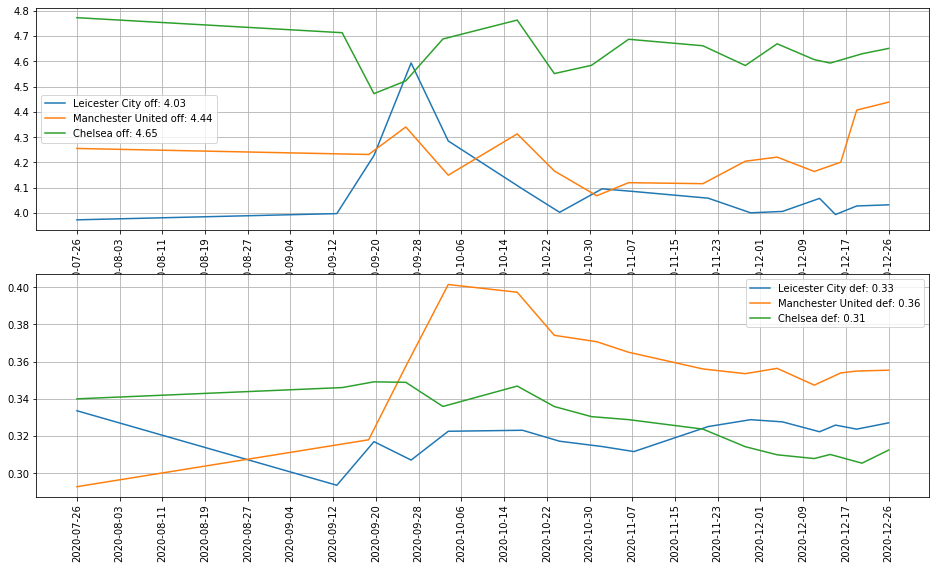

In [17]:
ax=None
for team in calib.teams.values():
    if team.name in ['Manchester United','Leicester City','Chelsea']:
    #if team.name in ['BPLHome','BPLAway']:
        ax=team.plt(ax=ax)
        #ax[0].axvline(x=37)
        #ax[1].axvline(x=37)


In [18]:
df=pd.read_csv('https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv')
df=df.set_index('name')
df = df.join(sr).reset_index()[['name','off','def','Off','Deff']].dropna()
df.head(10)

,name,off,def,Off,Deff
0,Manchester City,2.82,0.20,5.55,0.25
3,Liverpool,2.68,0.47,5.58,0.31
6,Chelsea,2.49,0.43,4.65,0.31
10,Manchester United,2.52,0.59,4.44,0.36
15,Tottenham Hotspur,2.24,0.57,4.19,0.36
21,Arsenal,2.13,0.59,3.60,0.34
24,Aston Villa,2.19,0.67,4.32,0.36
25,Leicester City,2.15,0.64,4.03,0.33
28,Southampton,1.96,0.63,3.49,0.36
31,Wolverhampton,1.83,0.55,2.99,0.32


array([ 2.17360985, -0.616487  ])

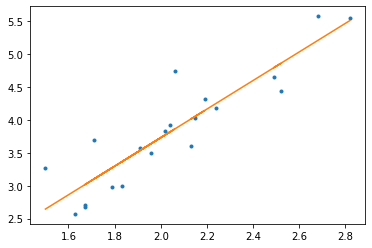

In [19]:
plt.plot(df['off'],df['Off'],'.')
poly = np.polyfit(df['off'],df['Off'],1)
plt.plot(df['off'],np.polyval(poly,df['off']))
poly

array([0.26971989, 0.18502177])

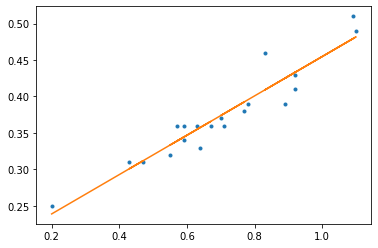

In [20]:
plt.plot(df['def'],df['Deff'],'.')
poly = np.polyfit(df['def'],df['Deff'],1)
plt.plot(df['def'],np.polyval(poly,df['def']))
poly

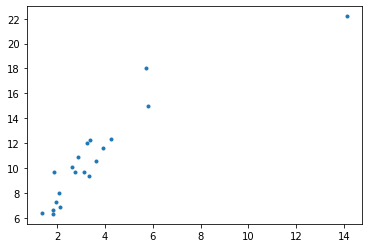

In [21]:
plt.plot(df['off']/df['def'],df['Off']/df['Deff'],'.')